<a href="https://colab.research.google.com/github/zhenyuefu/ITS/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import math

# Intervalle de coordonnées
XMAX = 200
XMIN = 0
YMAX = 200
YMIN = 0
# Paramètre Refroidir
L = 200
K = 0.99
T_init = 100.0
T_min = 1e-7
S = 0.05

# genere des donnes
temperature_fictive = np.random.normal(100, 10, (200, 200))
X = np.arange(0, 20, 0.1)
Y = np.arange(0, 20, 0.1)
X, Y = np.meshgrid(X, Y)

# define function


def f(X, Y):
    return -1*temperature_fictive[X, Y]




[49] [47] [139.86787098]
52.96345207373439
140.02370832640673


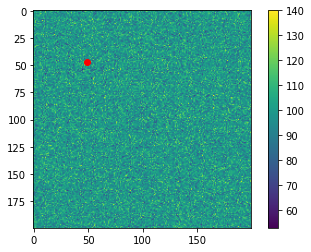

In [3]:
# init
x0 = np.random.randint(XMIN, XMAX)
y0 = np.random.randint(YMIN, YMAX)
T = T_init
x_current = x0
y_current = y0
x_best = x_current
y_best = y_current
x_best_history = np.array([x_best])
y_best_history = np.array([y_best])

while (T > T_min):
    counter = 0
    for i in range(L):
        p = 0
        while (p == 0):
            x_next = int(x_current + S*np.random.randint(-XMAX, XMAX))
            y_next = int(y_current + S*np.random.randint(-YMAX, YMAX))
            if (x_next >= XMIN) and (x_next < XMAX) and (y_next >= YMIN) and (y_next < YMAX):
                p = 1
        if (f(x_best, y_best) > f(x_next, y_next)):
            np.append(x_best_history, x_current)
            np.append(y_best_history, y_current)
            x_best = x_next
            y_best = y_next
        if (f(x_current, y_current)-f(x_next, y_next) > 0):
            x_current = x_next
            y_current = y_next
        else:
            changer = -1*(f(x_next, y_next)-f(x_current, y_current))/T
            p1 = math.exp(changer)
            if (p1 > np.random.random()):
                x_current = x_next
                y_current = y_next
    T = K*T

# display results
z = np.array([temperature_fictive[x_best, y_best]])
x_best = np.array([x_best])
y_best = np.array([y_best])
print(x_best, y_best, z)
print(temperature_fictive.min())
print(temperature_fictive.max())
fig = plt.figure()
plt.imshow(temperature_fictive)
plt.colorbar()
plt.plot(x_best, y_best, "ro", label="ex")
# ax = Axes3D(fig)
# ax.plot_surface(X, Y, temperature_fictive, cmap=plt.cm.winter)
# ax.scatter(x_best, y_best, z, c='r', marker='o')
plt.show()